In [1]:
import sys
sys.path.append('../../')

from PIL import Image
import torch
import pandas as pd
from model_runner import ModelRunner
from SRCNN import SRCNN
from image_helper import ImageHelper

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATASET_ROOT="../../datasets/"
DATASET_NAME = "Set5"
FULL_DATASET_PATH = f"{DATASET_ROOT}{DATASET_NAME}"
model_runner = ModelRunner()
image_helper = ImageHelper()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_f2_1 = SRCNN(f2=1).to(device)
model_f2_1_unfiltered = SRCNN(f2=1).to(device)
model_f2_lr_fixed = SRCNN(f2=1).to(device)

model_f2_5 = SRCNN(f2=5).to(device)
model_f2_5_unfiltered = SRCNN(f2=5).to(device)


In [4]:
# Load models
try:
    model_f2_1.load_state_dict(torch.load('./trained_models/model_f2_1.pth'))
    model_f2_1_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_1_unfiltered.pth'))
    model_f2_lr_fixed.load_state_dict(torch.load('./trained_models/model_f2_1_lr_fixed_1e-3.pth'))
    model_f2_5.load_state_dict(torch.load('./trained_models/model_f2_5.pth')) 
    model_f2_5_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_5_unfiltered.pth'))

except:
    model_f2_1.load_state_dict(torch.load('./trained_models/model_f2_1.pth', map_location=torch.device('cpu')))
    model_f2_1_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_1_unfiltered.pth', map_location=torch.device('cpu')))
    model_f2_lr_fixed.load_state_dict(torch.load('./trained_models/model_f2_1_lr_fixed_1e-3.pth', map_location=torch.device('cpu')))
    model_f2_5.load_state_dict(torch.load('./trained_models/model_f2_5.pth', map_location=torch.device('cpu')))
    model_f2_5_unfiltered.load_state_dict(torch.load('./trained_models/model_f2_5_unfiltered.pth', map_location=torch.device('cpu')))
    

In [5]:
# Load dataframes
model_f2_1_df = pd.read_csv('./dataframes/model_f2_1.csv')
model_f2_1_unfiltered_df = pd.read_csv('./dataframes/model_f2_1_unfiltered.csv')
model_f2_lr_fixed_df = pd.read_csv('./dataframes/model_f2_1_lr_fixed_1e-3.csv')
model_f2_5_df = pd.read_csv('./dataframes/model_f2_5.csv')
model_f2_5_unfiltered_df = pd.read_csv('./dataframes/model_f2_5_unfiltered.csv')


## **Comparando o treinamento**

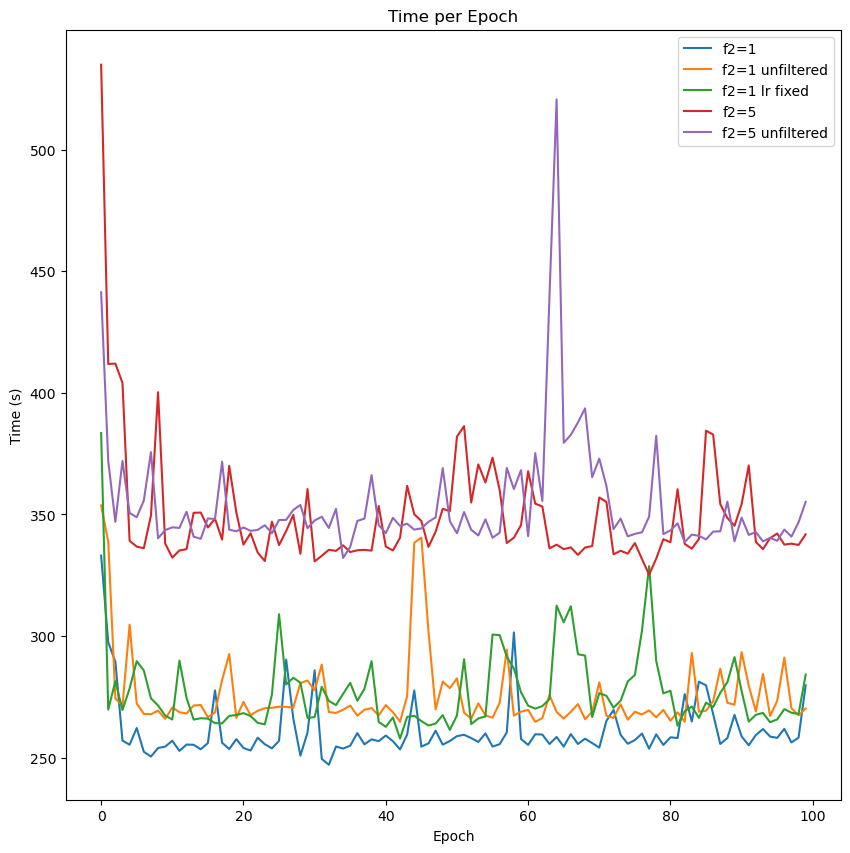

In [6]:
model_runner.plot_time_per_epoch_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)


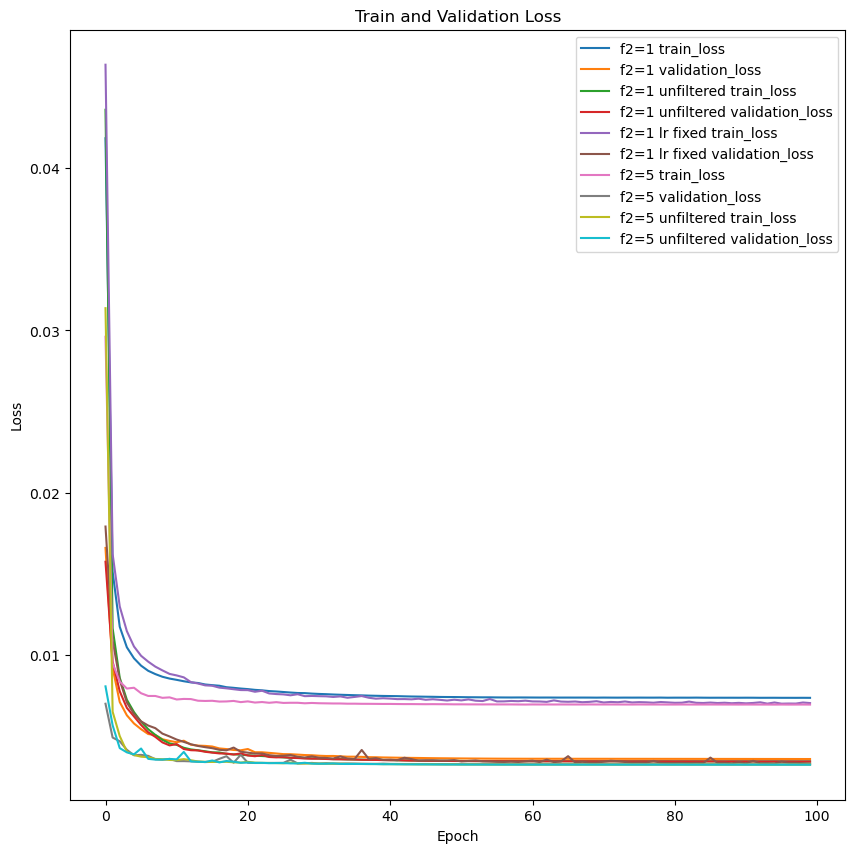

In [7]:
model_runner.plot_train_validation_loss_comparision(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
    False
)

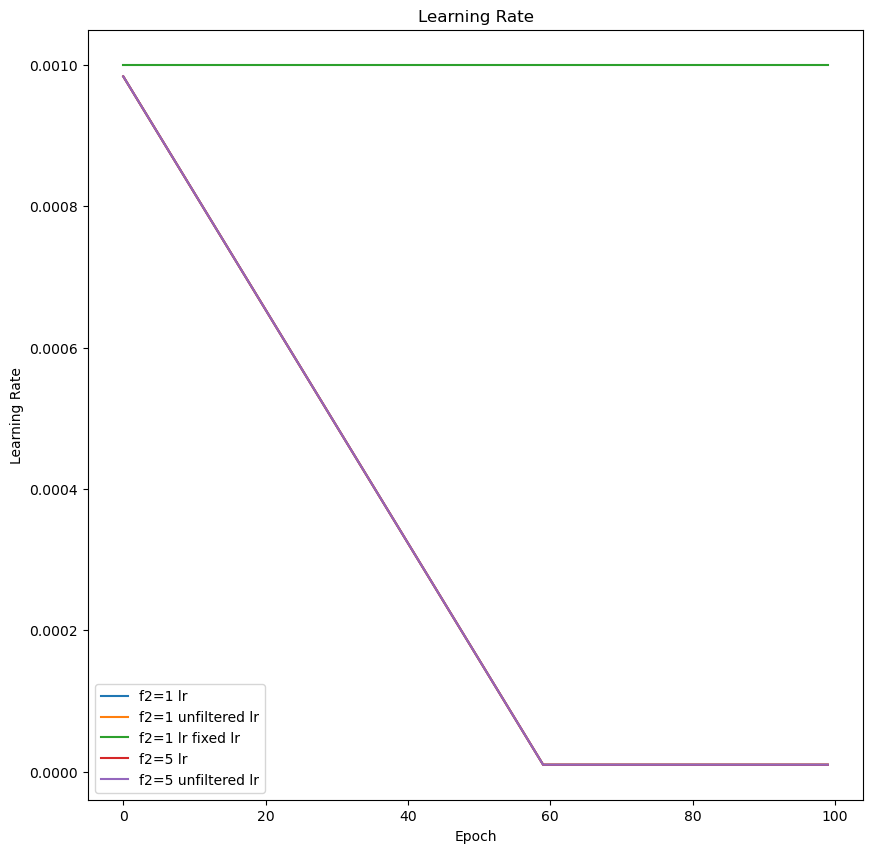

In [8]:
model_runner.plot_lr_comparison(
    [
        {
            "label": "f2=1",
            "df": model_f2_1_df,
        },
        {
            "label": "f2=1 unfiltered",
            "df": model_f2_1_unfiltered_df,
        },
        {
            "label": "f2=1 lr fixed",
            "df": model_f2_lr_fixed_df,
        },
        {
            "label": "f2=5",
            "df": model_f2_5_df,
        },
        {
            "label": "f2=5 unfiltered",
            "df": model_f2_5_unfiltered_df,
        }
    ],
)

#### - F2 maior -> maior tempo de processamento

## **Comparando os resultados**

In [9]:
model_runner.compare_models(
    [
        {
            "name": "f2=1",
            "model": model_f2_1,
        },
        {
            "name": "f2=1 unfiltered",
            "model": model_f2_1_unfiltered,
        },
        {
            "name": "f2=1 lr fixed",
            "model": model_f2_lr_fixed,
        },
        {
            "name": "f2=5",
            "model": model_f2_5,
        },
        {
            "name": "f2=5 unfiltered",
            "model": model_f2_5_unfiltered,
        },
    ],
    FULL_DATASET_PATH,
)

0it [00:00, ?it/s]

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
5it [00:04,  1.17it/s]
5it [00:04,  1.16it/s]
5it [00:03,  1.27it/s]
5it [00:04,  1.13it/s]
5it [00:04,  1.13it/s]


,f2=1,f2=1 unfiltered,f2=1 lr fixed,f2=5,f2=5 unfiltered
PSNR,27.648884,27.758627,28.131073,28.067570,27.973099
Bicubic PSNR,27.932240,27.932240,27.932240,27.932240,27.932240
SSIM,0.804685,0.820834,0.829121,0.832464,0.830046
Bicubic SSIM,0.833943,0.833943,0.833943,0.833943,0.833943


Podemos observar que o os dados filtrados fizeram uma diferenca no caso em que f2=5 **[Vai ser mostrado quando eu ajeitar os pesos do f2_5]**

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


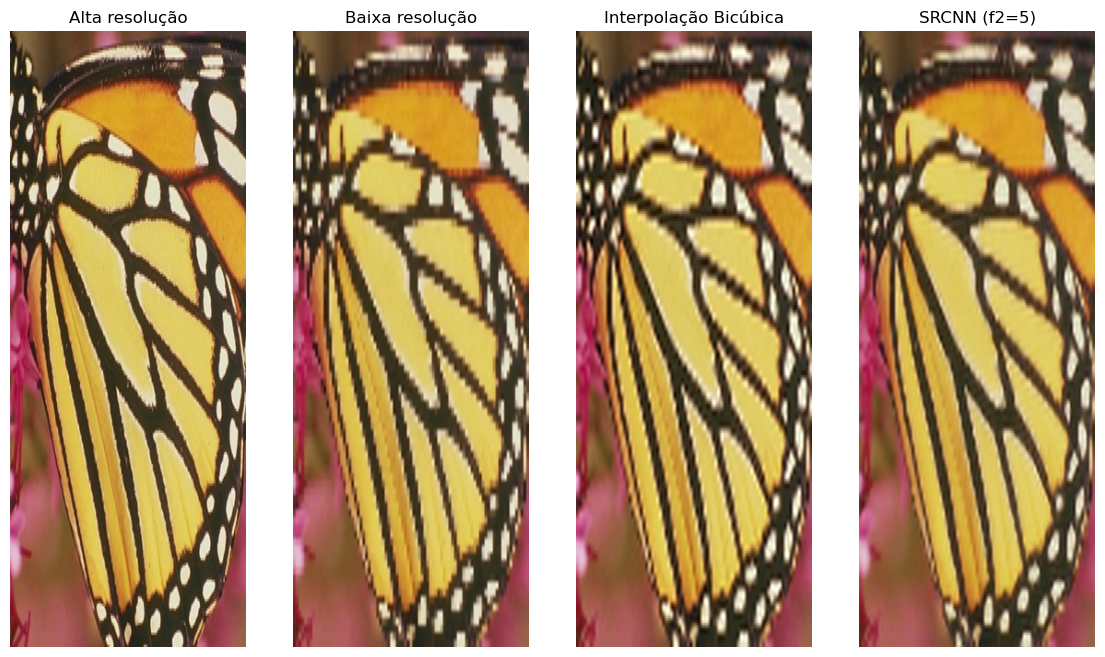

In [23]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/butterfly.png"
# IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/baby.png"

image_helper.show_tensor_as_images_side_by_side(
   [
       {
              "label": "Alta resolução",
                "tensor": image_helper.image_to_tensor(IMAGE_EXAMPLE),  
       },
        {
            "label": "Baixa resolução",
            "tensor": image_helper.downsample_image_as_tensor(
                IMAGE_EXAMPLE, 3, interpolation=Image.BICUBIC,
            ),
        },
            {
                "label": "Interpolação Bicúbica",
                "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                    IMAGE_EXAMPLE, 3
                ),
            },
            {
                "label": "SRCNN (f2=5)",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_5,
                    IMAGE_EXAMPLE,
                    3
                )
            },
   ],
   show_grid=False
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


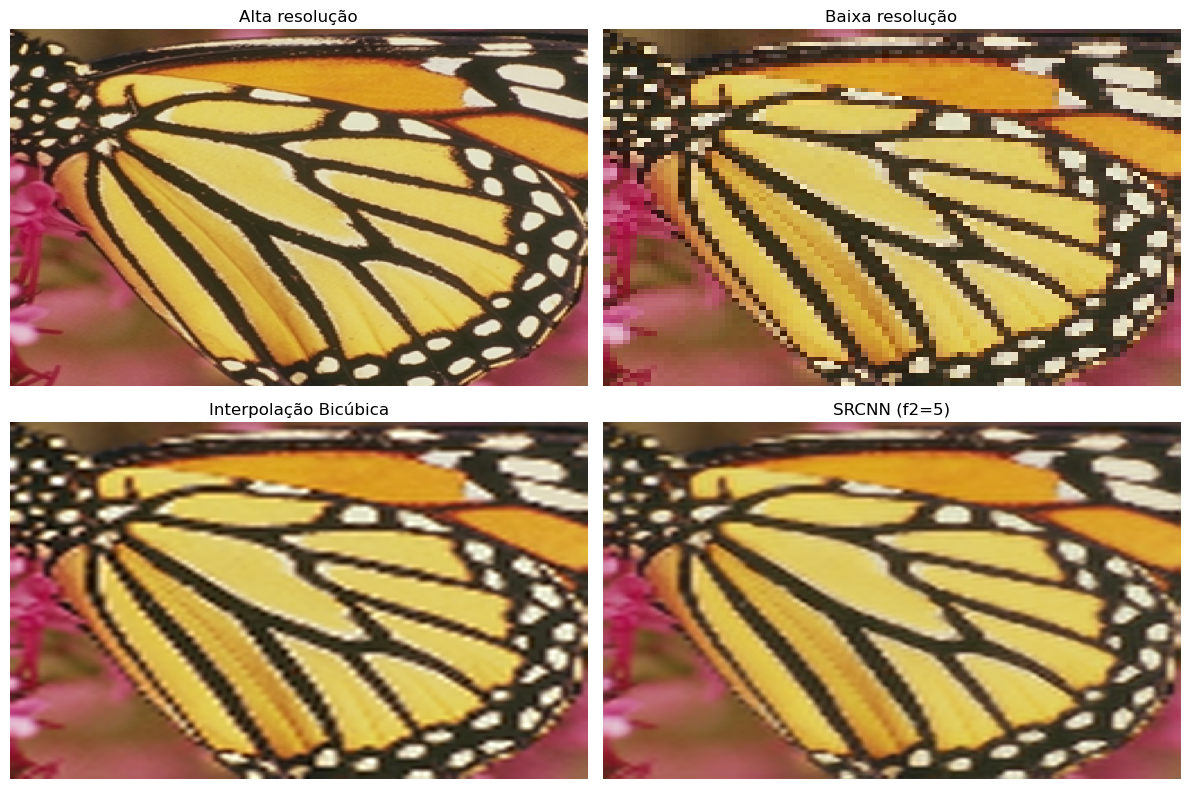

In [11]:
IMAGE_EXAMPLE = f"{FULL_DATASET_PATH}/butterfly.png"

image_helper.show_tensors_custom_grid(
   [
       {
              "label": "Alta resolução",
                "tensor": image_helper.image_to_tensor(IMAGE_EXAMPLE),  
       },
        {
            "label": "Baixa resolução",
            "tensor": image_helper.downsample_image_as_tensor(
                IMAGE_EXAMPLE, 3, interpolation=Image.BICUBIC,
            ),
        },
            {
                "label": "Interpolação Bicúbica",
                "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                    IMAGE_EXAMPLE, 3
                ),
            },
            {
                "label": "SRCNN (f2=5)",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_5,
                    IMAGE_EXAMPLE,
                    3
                )
            },
   ],
   rows=2, cols=2
)